# TUGAS KELOMPOK IMPLEMENTASI CNN

Nama Anggota:
1. Anggito Anju Hartawan Manalu - 5025201216
2. Eldenabih Tavirazin Lutvie - 5025201213
3. Aqil -
4. Sayid Zyad -

# 1. Import Libraries

Kita akan menggunakan modul keras untuk implementasi CNN. Kita akan memakai model Sequential pada implementasi kali ini.

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# 2. Pisahkan Data Train dan Data Test

Selanjutnya kita akan me-load data dan menyimpan data-data tersebut menjadi data train dan data test.


In [ ]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# 3. Reshape Data

Selanjutnya kita akan membuat ulang bentuk data yang akan kita simpan. Untuk paramenter-parameternya (n_images, x_shape, y_shape, channels)

Disini channels merupakan penentuan warna gambar

In [ ]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

# 4. Ubah Bentuk Data

Kemudian kita harus mengubah nilai dari tiap piksel sehingga memiliki range 0 sampai 1. Hal ini dapat meningkatkan kemampuan model untuk belajar.

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [ ]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# 5. Training

Kita akan membuat model dengan semua layer terkait untuk melakukan training pada model sebagai berikut

In [ ]:
# Sequential Model
model = Sequential()

In [ ]:
# Convolation Layer and Pooling Layer
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Convolation Layer and Pooling Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Hidden Layer
model.add(Flatten())
model.add(Dense(64))

In [ ]:
# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
# Melakukan compile pada model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
# Melakukan training data dengan 5 kali perulangan forward-back propagation
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 52s 55ms/step - loss: 0.4755 - accuracy: 0.8295
Epoch 2/5
938/938 [==============================] - 52s 56ms/step - loss: 0.3181 - accuracy: 0.8850
Epoch 3/5
938/938 [==============================] - 52s 56ms/step - loss: 0.2803 - accuracy: 0.8982
Epoch 4/5
938/938 [==============================] - 51s 54ms/step - loss: 0.2491 - accuracy: 0.9100
Epoch 5/5
938/938 [==============================] - 50s 53ms/step - loss: 0.2300 - accuracy: 0.9154


# 6. Evaluation

Setelah dilakukan training kita akan melihat tingkat akurasi dan tingkat kesalahan dari training model terkait.

In [ ]:
# Evaluasi training
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.2797 - accuracy: 0.9000
Test loss 0.2796740233898163
Test accuracy 0.8999999761581421


# 7. Testing

Pada step terakhir, kita akan melakukan testing pada model yang telah kita buat untuk image yang kita buat untuk testing.

In [ ]:
# TEST 1
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

313/313 [==============================] - 3s 10ms/step
9


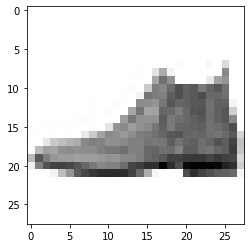

In [ ]:
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [ ]:
# TEST 2
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[1])))

313/313 [==============================] - 2s 8ms/step
2


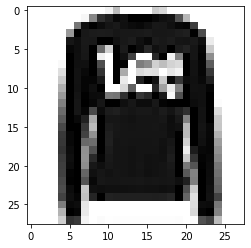

In [ ]:
plt.imshow(test_X[1].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [ ]:
# TEST 3
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[2])))

313/313 [==============================] - 3s 8ms/step
1


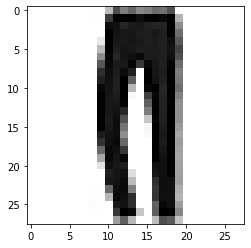

In [ ]:
plt.imshow(test_X[2].reshape(28, 28), cmap = plt.cm.binary)
plt.show()